In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.read_table('http://bit.ly/chiporders')

In [ ]:
X.head()

In [ ]:
pd.read_table('http://bit.ly/movieusers', sep = '|').head()

In [ ]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
type(ufo)

In [ ]:
ufo.head()

In [ ]:
ufo.sample(n= 6, )

In [ ]:
ufo['location'] = ufo.City  +  ',' + ufo.State

In [ ]:
ufo.sample(2)

In [ ]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [ ]:
movies.sample(5)

In [ ]:
movies.describe(include = 'all')


In [ ]:
movies.shape


In [ ]:
movies.dtypes

In [ ]:
movies.head()

In [ ]:
movies.sort_values('duration', inplace = True)

In [ ]:
movies.head()

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
drinks.sample(5)

In [ ]:
from __future__ import print_function, division

import math
import numpy as np
from scipy.special import gamma

from thinkbayes2 import Pmf, Suite

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn.cross_validation

In [2]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

In [3]:
wine_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
414,8.8,0.52,0.34,2.7,0.087,24.0,122.0,0.99820,3.26,0.61,9.5,5
1144,7.3,0.32,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1,5
348,9.6,0.56,0.31,2.8,0.089,15.0,46.0,0.99790,3.11,0.92,10.0,6
937,12.0,0.63,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,4
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [4]:
Y = wine_df.quality.values
wine_df = wine_df.drop('quality', axis = 1)
Y = np.asarray([1 if i>=7 else 0 for i in Y])

wine_df.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
X = wine_df.as_matrix()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

scores = []

for val in range(1,41):
    clf = RandomForestClassifier(n_estimators = val) #n_estimators is the parameter specifying the number of trees inRandomForestClassifier
    validated = cross_val_score(clf, X, Y, cv =10)
    scores.append(validated)
    

In [11]:
scores


[array([ 0.8757764 ,  0.82608696,  0.775     ,  0.85625   ,  0.83125   ,
         0.80625   ,  0.825     ,  0.8427673 ,  0.88679245,  0.82389937]),
 array([ 0.86956522,  0.86335404,  0.81875   ,  0.80625   ,  0.8875    ,
         0.86875   ,  0.83125   ,  0.85534591,  0.87421384,  0.89937107]),
 array([ 0.90062112,  0.86956522,  0.8125    ,  0.85      ,  0.86875   ,
         0.83125   ,  0.81875   ,  0.80503145,  0.86792453,  0.8427673 ]),
 array([ 0.88819876,  0.90062112,  0.8375    ,  0.83125   ,  0.90625   ,
         0.8375    ,  0.8625    ,  0.85534591,  0.88050314,  0.85534591]),
 array([ 0.85714286,  0.85093168,  0.86875   ,  0.8125    ,  0.8875    ,
         0.8375    ,  0.83125   ,  0.8427673 ,  0.86163522,  0.87421384]),
 array([ 0.88198758,  0.8757764 ,  0.80625   ,  0.8875    ,  0.9       ,
         0.83125   ,  0.84375   ,  0.86792453,  0.89308176,  0.89937107]),
 array([ 0.88198758,  0.88819876,  0.8625    ,  0.83125   ,  0.90625   ,
         0.85625   ,  0.83125   ,  0.83

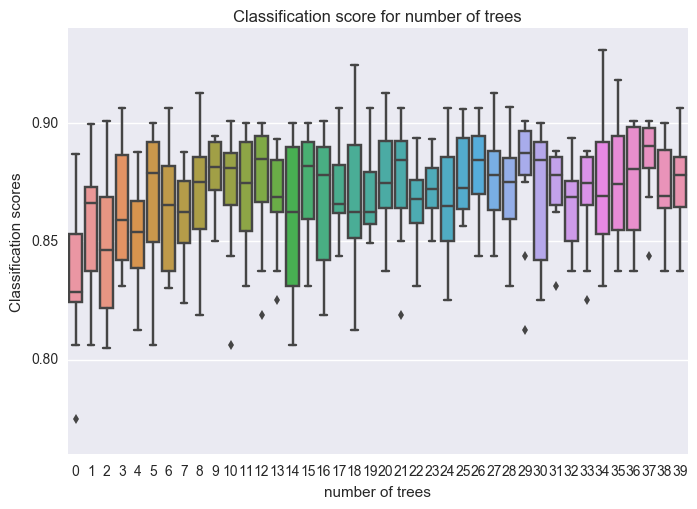

In [12]:
sns.boxplot(data = scores)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()

86.4290181363


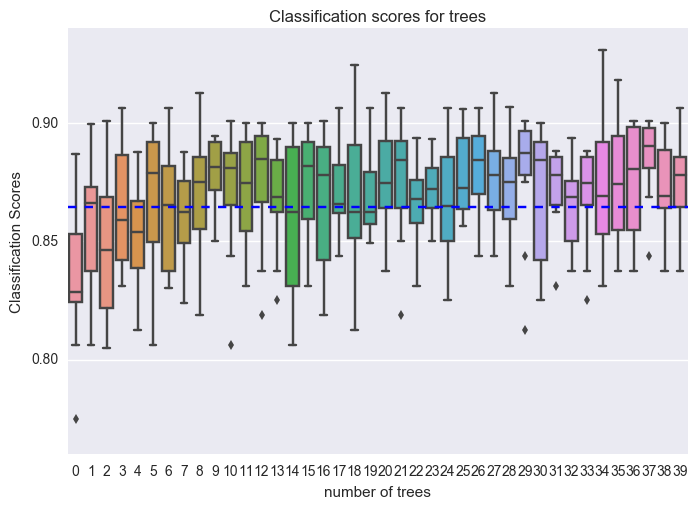

In [13]:
len_y = len(Y)
temp = [i for i in Y if i ==0]
temp_1 = temp.count(0)

percentage = float(temp_1)/float(len_y)

print float(temp_1)/float(len_y) * 100

sns.boxplot(data = scores)
plt.axhline(y = percentage, ls = '--')

plt.xlabel('number of trees')
plt.ylabel('Classification Scores')
plt.title('Classification scores for trees')

plt.show()

In [15]:
f1_scores = []

for val in range(1,41):
    clf = RandomForestClassifier(n_estimators = val) #n_estimators is the parameter specifying the number of trees inRandomForestClassifier
    validated = cross_val_score(clf, X, Y, cv =10, scoring = 'f1')
    f1_scores.append(validated)

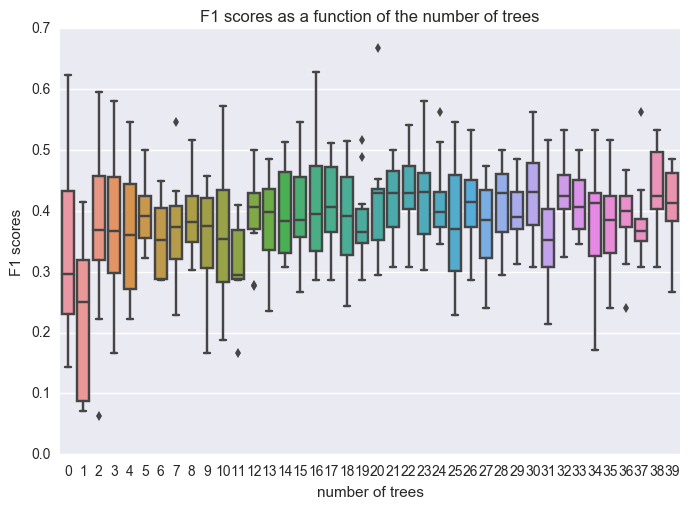

In [17]:
sns.boxplot(data = f1_scores)
plt.xlabel('number of trees')
plt.ylabel('F1 scores')
plt.title('F1 scores as a function of the number of trees')
plt.show()